In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 5-color palette
color_palette = ['orchid', 'cornflowerblue', 'mediumaquamarine', 'mediumpurple', 'darksalmon']

def five_color_planar_coloring(graph):
    # Step 1: Check if the graph is planar
    is_planar, _ = nx.check_planarity(graph)
    if not is_planar:
        raise ValueError("The input graph is not planar and cannot be 5-colored.")

    # Step 2: Vertex reduction
    stack = []
    mutable_graph = graph.copy()

    """
    Stack is used to store removed vertices along with their neighbors. 
    This allows the algorithm to "rebuild" the graph later in reverse order.
    Then a mutable copy of the graph is created for modification during reduction
    """
    
    while mutable_graph.nodes:
        # Find a vertex with degree <= 5
        for node in list(mutable_graph.nodes):
            if mutable_graph.degree[node] <= 5:
                stack.append((node, list(mutable_graph.neighbors(node))))
                mutable_graph.remove_node(node)
                break
        else:
            raise ValueError("Graph reduction failed. This should not occur for a planar graph.")

    # Step 3: Reinstatement and coloring
    node_colors = {}
   
    """
    A dictionary is used to store the color assigned to each node.
    """

    while stack:
        node, neighbors = stack.pop()
        neighbor_colors = {node_colors[neighbor] for neighbor in neighbors if neighbor in node_colors}
        
        '''
        If all five neighbors have distinct colors, we need to perform a color swap to ensure that two neighbors share the same color, freeing up a color for the current node.
        ''' 
        
        if len(neighbor_colors) == 5:
            # Find two neighbors that can be recolored to the same color
            for neighbor in neighbors:
                if neighbor not in node_colors:
                    continue
                neighbor_color = node_colors[neighbor]
                # Try to find a color that can be swapped
                for color in color_palette:
                    if color == neighbor_color:
                        continue
                    # Check if the color can be swapped without conflict
                    can_swap = True
                    for n in graph.neighbors(neighbor):
                        if n in node_colors and node_colors[n] == color:
                            can_swap = False
                            break
                    if can_swap:
                        # Swap the color of the neighbor
                        node_colors[neighbor] = color
                        neighbor_colors = {node_colors[neighbor] for neighbor in neighbors if neighbor in node_colors}
                        break

        # Assign the first available color that is not used by neighbors
        for color in color_palette:
            if color not in neighbor_colors:
                node_colors[node] = color
                break

    return node_colors

# Visualization function
def visualize_colored_graph(graph, node_colors):
    pos = nx.spring_layout(graph)
    colors = [node_colors[node] for node in graph.nodes]
    nx.draw(graph, pos, with_labels=True, node_color=colors, node_size=500, font_color='white')
    plt.show()


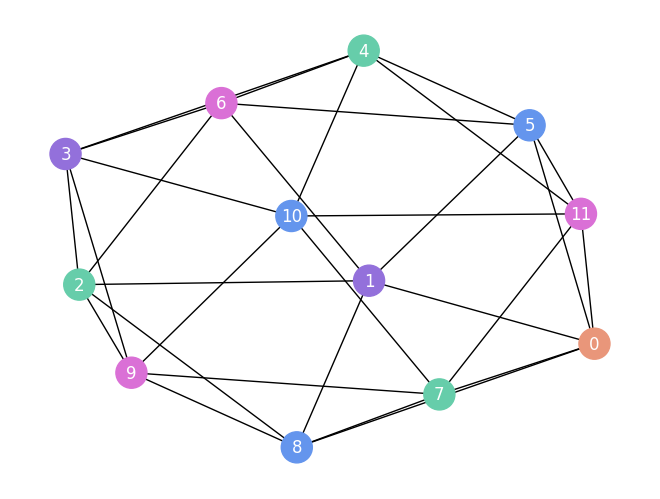

In [2]:
# Example usage
if __name__ == "__main__":
    # Create a planar graph
    G = nx.icosahedral_graph()

    # Get the 5-coloring
    coloring = five_color_planar_coloring(G)

    # Visualize the graph
    visualize_colored_graph(G, coloring)